# GABCARS: Desvelando Tendencias y Descifrando Datos en el Universo Automotriz
## Presentación de Trabajo Final


## Integrantes:
#### Paucar Montellanos, Abi Melani (U202112054)
#### Marcatinco Bravo Angielinhe Megumi (U20211B806)
#### Reynoso Araujo Jeremy Saul – (U202113694)
#### Gutierrez Pozo Edson Alexander (U201425449)
#### Tapia Hurtado Ana Maria (U20211e348)


## Profesor:
### Barboza Coronado, José Carlos

## Tabla de contenidos
- [Introducción](#intro)
- [Selección y carga de datos](#select)
- [Descripción del conjunto de datos](#descr)
- [Análisis y limpieza de datos](#limp)
- [Modelado y análisis estadístico](#model)
- [Visualización de datos con Power BI](#powerbi)
- [Conclusiones finales](#conclu)

<a id='intro'></a>
# Introducción 
En el competitivo escenario del transporte corporativo en Lima, GABCARS se erige como un referente de excelencia y servicio. Con un compromiso constante con la eficiencia, la empresa ha consolidado una reputación sólida basada en la calidad de sus servicios y la atención personalizada a los clientes. Este análisis profundiza en las métricas y datos históricos de GABCARS para identificar áreas de mejora y optimizar la experiencia del cliente.

El conjunto de datos consta de 11,545 filas y 13 columnas, que contienen diversas variables como conductores, rutas solicitadas, horarios, tarifas y distancias en kilómetros. Este análisis tiene como objetivo optimizar las operaciones de la empresa, reflexionar sobre la eficiencia de recursos y costos, y ofrecer un mejor servicio a los usuarios.

<a id='select'></a>
# Selección y carga de datos
> En este primer paso cargaremos el conjunto de datos de GABCARS en este entorno de programación con la finalidad de analizarlos.

In [24]:
import pandas as pd 
import numpy as np 
import seaborn as sb 
import matplotlib.pyplot as plt

 > El sol aún no había salido el 1 de enero, cuando Eduardo Chilón revisaba su primer servicio del año. La ciudad aún estaba tranquila después de las celebraciones de Año Nuevo. Eduardo debía recoger a sus pasajeros en T. Gutierrez y llevarlos a la zona de Independencia. Partió puntualmente a las 2:07 AM, con la misión de empezar el año con pie derecho. Asi como Eduardo , muchos de los transportistas de la empresa GabCar son responsables y puntuales en su servicio de taxis ,en el siguiente recuadro puedes ver una muestra de los colaboradores de la empresa y como han ido desenvolviéndose en este año, mediante el uso del dataset y la función pd.read abarcaremos en profundidad los datos a analizar en esta prestigiosa empresa.

In [25]:
df_r = pd.read_csv("../input/database-2022-gabcars/Database_2022 _LIMPIEZA.csv", sep=';')
df_r.head()


,Fecha,Nro. Vale,Conductor,Origen,Rutas x Dia,N� Crew,H.Inicial,H. Final,KM,Tarifa,Peaje/Currier,T. Espera,T.Total
0,1/01/2022,56961,EDUARDO CHILON,T. Gutierrez,INDEPENDENCIA,1.0,02:07:00,02:39:00,24,45.0,NaN,NaN,45.0
1,1/01/2022,61096,LUIS FERNANDO,T. Gutierrez,SURCO - SURQUILLO - MIRAFLORES,3.0,01:59:00,02:29:00,19,45.0,NaN,NaN,45.0
2,2/01/2022,53348,ALEXIS HINOSTROZA,T. Gutierrez,SURQUILLO - SJM,2.0,01:50:00,02:25:00,24,45.0,NaN,NaN,45.0
3,2/01/2022,60758,CESAR MORALES,T. Gutierrez,INDEPENDENCIA,1.0,01:55:00,02:22:00,21,45.0,NaN,NaN,45.0
4,3/01/2022,59555,ALEXIS HINOSTROZA,T. Gutierrez,SURQUILLO - SJM,2.0,01:50:00,02:25:00,24,45.0,NaN,NaN,45.0


<a id='descr'></a>

# Descripción del conjunto de datos

> En el vasto mundo de la ciudad, donde cada calle tiene su historia y cada pasajero una necesidad, nuestra flota de taxis ha estado en constante movimiento entregando un servicio de excelencia. En esta seccion utilizaremos técnicas de exploración de datos en Python para comprender los tipos de datos y analizaremos los datos de los servicios para entender mejor cómo se desempeña la empresa.

#### Identificamos la cantidad de registros identificado en filas y columnas. Se cuentan con 13 columnas y 11 544 registros (sin contar el encabezado)

In [26]:
df_r.shape

(11545, 13)

#### Estructura del conjunto de datos

In [27]:
print(df_r.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11545 entries, 0 to 11544
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Fecha          11545 non-null  object 
 1   Nro. Vale      11545 non-null  int64  
 2   Conductor      11545 non-null  object 
 3   Origen         11545 non-null  object 
 4   Rutas x Dia    11543 non-null  object 
 5   N� Crew        11541 non-null  float64
 6   H.Inicial      11545 non-null  object 
 7   H. Final       11545 non-null  object 
 8   KM             11545 non-null  int64  
 9   Tarifa         11545 non-null  float64
 10  Peaje/Currier  92 non-null     object 
 11  T. Espera      2627 non-null   object 
 12  T.Total        11545 non-null  float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB
None


#### Usando la función describe nos brinda una descripción rápida de nuestra base de datos.

In [28]:
# Estadísticas descriptivas
df_r.describe()

,Nro. Vale,N� Crew,KM,Tarifa,T.Total
count,11545.000000,11541.000000,11545.000000,11545.000000,11545.000000
mean,60004.758077,3.253444,26.472845,51.906020,54.851330
std,5770.253610,1.085339,11.700591,12.400299,13.923113
min,50000.000000,0.000000,0.000000,45.000000,45.000000
25%,54956.000000,3.000000,18.000000,45.000000,45.000000
50%,59972.000000,3.000000,24.000000,45.000000,49.000000
75%,65100.000000,4.000000,35.000000,55.000000,61.000000
max,69999.000000,11.000000,82.000000,149.000000,169.000000


#### Identificar valores nulos

In [29]:
print(df_r.isnull().sum())

Fecha                0
Nro. Vale            0
Conductor            0
Origen               0
Rutas x Dia          2
N� Crew              4
H.Inicial            0
H. Final             0
KM                   0
Tarifa               0
Peaje/Currier    11453
T. Espera         8918
T.Total              0
dtype: int64


#### Finalmente, exploraremos los datos mediante el Diccionario realizado en base a estos para entender mejor la información que se presentará

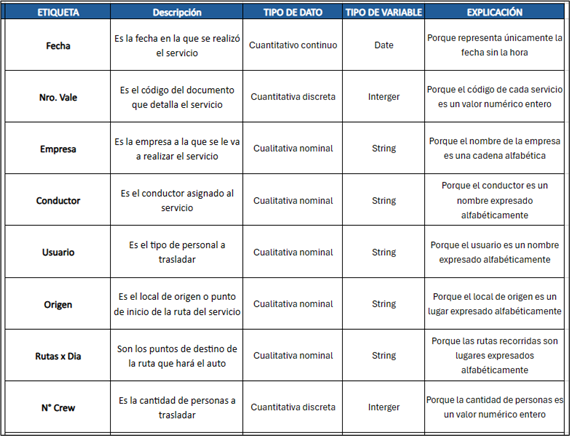

In [30]:
from IPython.display import Image
Image("//kaggle/input/diccionario/1.png")

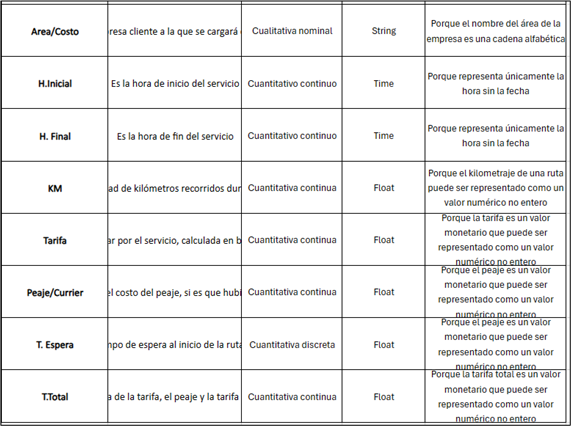

In [31]:
from IPython.display import Image
Image("//kaggle/input/diccionario/2.png")

#### Usando la función dtypes identificamos el tipo de dato de cada una de nuestras variables.

#### A continuación, observamos una gráfica que nos presenta la distribución del kilometraje con respecto a la cantidad de viajes realizados durante el año 2022

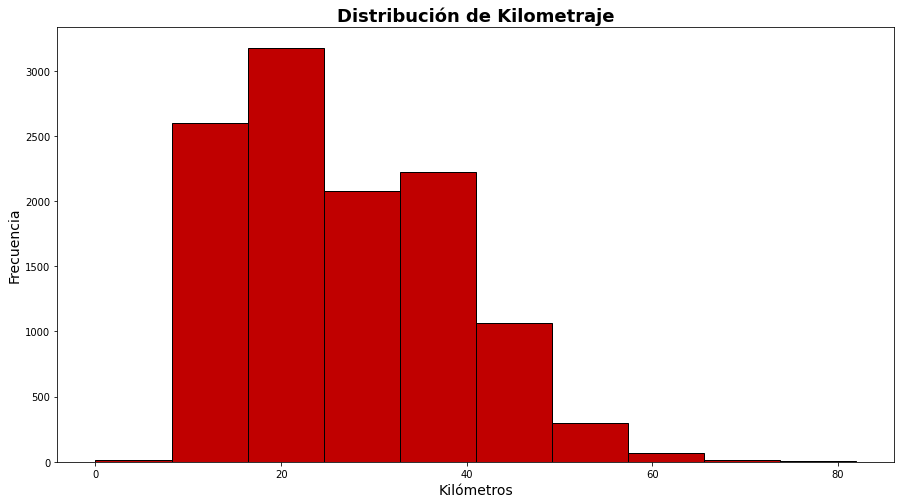

In [32]:
plt.figure(figsize=(15, 8))

# Crear el histograma
df_r["KM"].plot.hist(color='#C00000', edgecolor='black')

# Añadir título y etiquetas
plt.title('Distribución de Kilometraje', fontsize=18, fontweight='bold')
plt.xlabel('Kilómetros', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Mostrar el gráfico
plt.show()

> En esta gráfica, podemos observar que la gran mayoría de viajes se encuentran en un rango de 20 kilómetros, siendo este el recorrido promedio en la mayoría de rutas asignadas, siguiendole las rutas en un rango de 10 kilómetros. Así, a través de esta visualización, exploramos las profundidades de nuestros datos y descubrimos los patrones que dan forma a nuestras operaciones.

#### Luego, se tiene la gráfica de distribución de la cantidad de crews que se transportaron por cada viaje durante el año 2022 . Es importante tener en cuenta que se le denomina crews a los colaboradores de las empresas que contratan el servicio para transportarlos.

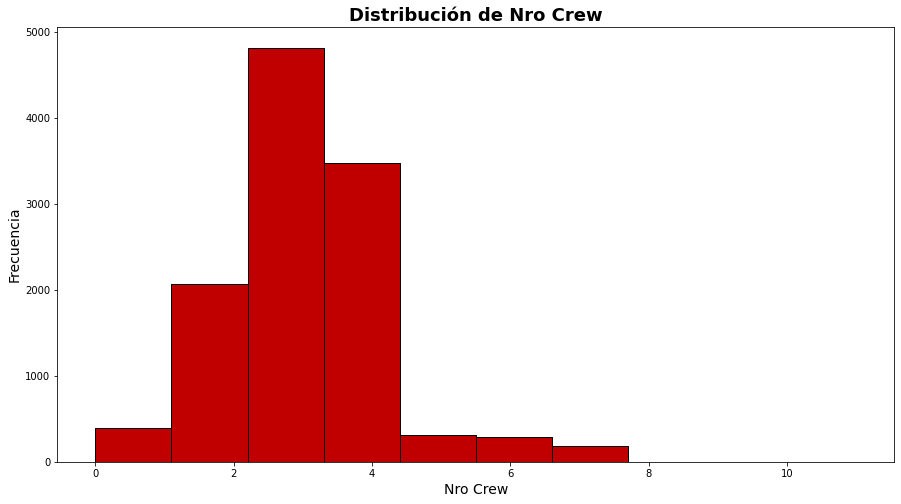

In [33]:
plt.figure(figsize=(15, 8))

# Crear el histograma
df_r["N� Crew"].plot.hist(color='#C00000', edgecolor='black')

# Añadir título y etiquetas
plt.title('Distribución de Nro Crew', fontsize=18, fontweight='bold')
plt.xlabel('Nro Crew', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Mostrar el gráfico
plt.show()

> En esta gráfica, podemos observar que en la mayoría de viajes se transportan entre 3 y 4 crews, esto debido a que siempre se busca la optimización de rutas para poder obtener el menor costo de transporte posible, de tal forma que se opta por transportar en un mismo auto a los colaboradores que viven en zonas aledañas entre sí. 

#### Después, se tiene la gráfica de distribución del costo de tarifa del servicio en soles por cada viaje durante el año 2022.

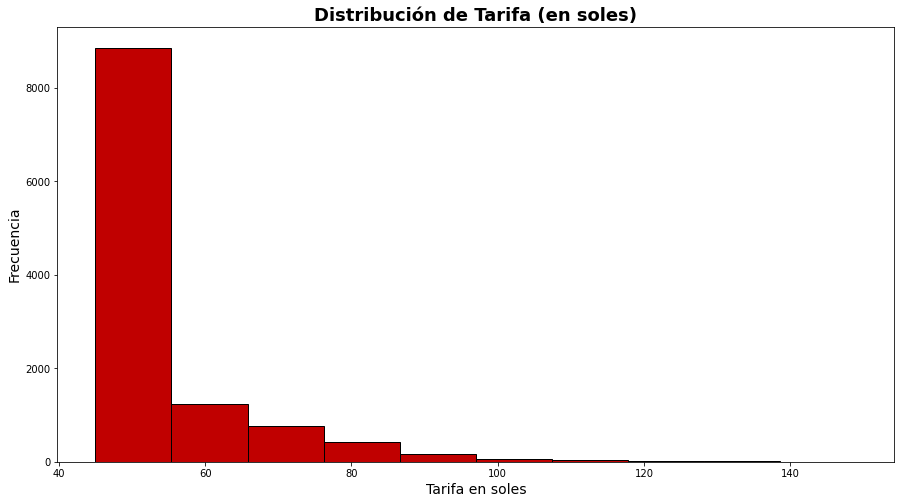

In [34]:
plt.figure(figsize=(15, 8))

# Crear el histograma
df_r["Tarifa"].plot.hist(color='#C00000', edgecolor='black')

# Añadir título y etiquetas
plt.title('Distribución de Tarifa (en soles)', fontsize=18, fontweight='bold')
plt.xlabel('Tarifa en soles', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Mostrar el gráfico
plt.show()

> Al adentrarnos en esta gráfica, nos encontramos con un indicio conocido por la empresa  que traza el costo de los viajes en su sistema.Podemos observar que la mayoría de viajes tienen un costo en el rango de S/. 45 a S/. 55,  lo cual es congruente con la gráfica que analiza el kilometraje ya que existe una relación entre la tarifa y el kilometraje.

#### Finalmente, analizaremos la gráfica de distribución de los viajes realizados durante el año 2022 ordenados por el local de origen del servicio, con la finalidad de analizar las relaciones entre estos.

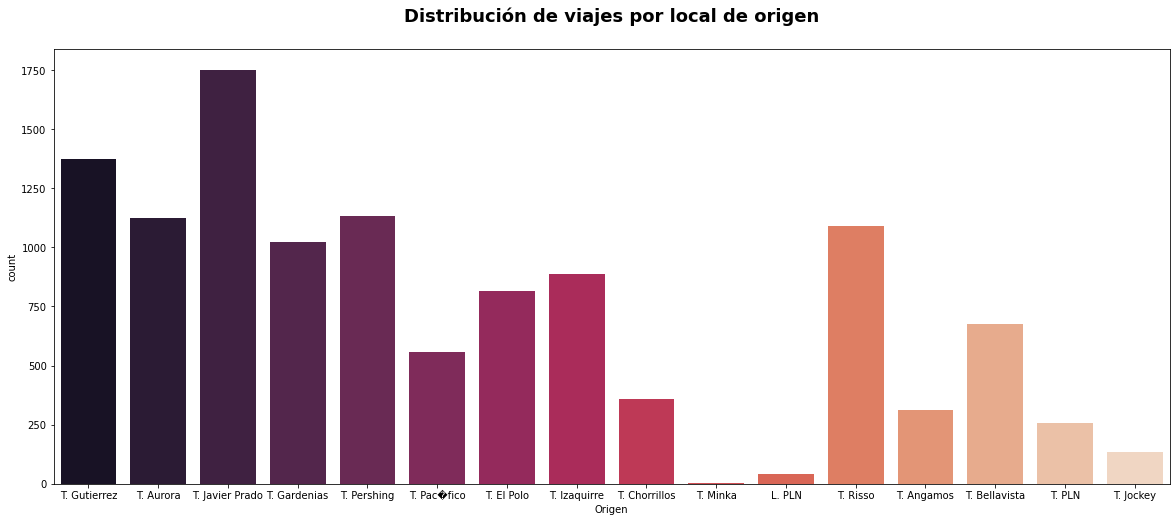

In [35]:
plt.figure(figsize=(20, 8))
sb.countplot(data = df_r ,x=df_r.Origen , palette = 'rocket'  );
plt.title('Distribución de viajes por local de origen' , y=1.05, fontsize=18, fontweight='bold');
plt.show()

> En esta gráfica podemos observar que los locales que han solicitado más servicios a lo largo del año son Javier Prado y Gutiérrez, ya que cuentan con una cantidad significativamente mayor de viajes al resto de locales. Esto podría indicar una mayor actividad comercial, residencial o de tránsito en estas áreas, lo que aumenta la necesidad de servicios de transporte. Por otro lado, la baja demanda de servicios en Jockey y PLN sugiere una menor actividad en estas zonas o una menor dependencia del transporte externo. Esta información es útil para comprender las dinámicas de movilidad en diferentes áreas y puede informar decisiones relacionadas con la asignación de recursos y la planificación de servicios de transporte.

<a id='limp'></a>

# Análisis y limpieza de datos

> En esta sección realizaremos un análisis más profundo de los datos para identificar patrones, tendencias y posibles anomalías. También limpiaremos los datos si es necesario, eliminando valores nulos, inconsistencias o errores.

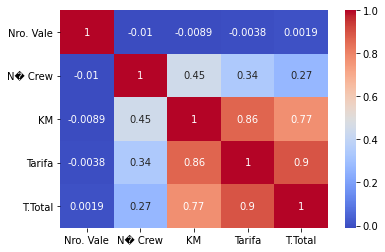

In [36]:
# Identificar patrones y tendencias
correlation_matrix = df_r.corr()
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [1]:
# Limpiar los datos (ejemplo eliminando filas con valores nulos)
df_cleaned = df_r.dropna()


NameError: name 'df_r' is not defined

<a id='model'></a>

# Modelado y análisis estadístico

> En esta sección aplicaremos técnicas de modelado y análisis estadístico adecuadas para el tipo de datos y los objetivos del análisis.
Utilizaremos librerías de Python como pandas, numPy, seaborn y matplotlib según consideremos necesario. Además de utilizar las funciones estudiadas en Python (integradas, importadas y definidas por el usuario

### Identificar la cantidad de números pares e impares de los datos de tipo entero

In [38]:
from collections import defaultdict

def contar_pares_impares_por_columnas(df, columnas):
    pares = defaultdict(int)
    impares = defaultdict(int)
    
    for col in columnas:
        for value in df[col]:
            try:
                num = int(value)
                if num % 2 == 0:
                    pares[col] += 1
                else:
                    impares[col] += 1
            except ValueError:
                pass  # Ignorar valores que no son números
                    
    return pares, impares

# Lista de columnas para dividir pares e impares
columnas_division = ['Nro. Vale', 'KM']

# Llamar a la función para contar pares e impares en las columnas especificadas
pares, impares = contar_pares_impares_por_columnas(df_r, columnas_division)

# Imprimir resultados
print("Cantidad de números pares por columna:")
for col, count in pares.items():
    print(f"{col}: {count}")

print("\nCantidad de números impares por columna:")
for col, count in impares.items():
    print(f"{col}: {count}")


Cantidad de números pares por columna:
Nro. Vale: 5797
KM: 7058

Cantidad de números impares por columna:
Nro. Vale: 5748
KM: 4487


> Funciones integradas:
  > - int(): Se utiliza para convertir los valores a enteros dentro del bloque try-except.
  > - print(): Imprime un mensaje en la consola.
  > - dict.items(): Devuelve una vista de objetos diccionario como pares clave-valor.


> Funciones importadas:
  > - collections.defaultdict: Se importa del módulo collections y se utiliza para crear diccionarios con valores predeterminados. Reemplaza la necesidad de inicializar manualmente los diccionarios pares e impares.

> Funciones definidas por el usuario:
  > - contar_pares_impares_por_columnas(): Esta función está definida por el usuario y se utiliza para contar la cantidad de números pares e impares en las columnas especificadas de un DataFrame.

### Identificar cantidad de caracteres en todas las variables de dato tipo string

In [39]:
import pandas as pd

# Definimos los campos de interés
campos_str = ["Conductor", "Origen", "Rutas x Dia"]

# Función para encontrar el dato con más y menos caracteres en un campo específico
def dato_max_min_caracteres(df, campo):
    # Convierte la columna a string y calcula la longitud de cada elemento
    longitudes = df[campo].astype(str).apply(len)
    # Encuentra el índice del elemento con la longitud máxima
    max_idx = longitudes.idxmax()
    # Encuentra el índice del elemento con la longitud mínima
    min_idx = longitudes.idxmin()
    # Devuelve los datos en los índices encontrados
    return df[campo][max_idx], df[campo][min_idx]

# Leer el archivo CSV
df_r = pd.read_csv("../input/database-2022-gabcars/Database_2022 _LIMPIEZA.csv", sep=';')

# Iteramos sobre cada campo y aplicamos la función
for campo in campos_str:
    max_dato, min_dato = dato_max_min_caracteres(df_r, campo)  # Encuentra los datos con más y menos caracteres en el campo actual
    print(f"El dato con más caracteres en el campo '{campo}' es: {max_dato}")  # Imprime el dato con más caracteres
    print(f"El dato con menos caracteres en el campo '{campo}' es: {min_dato}")  # Imprime el dato con menos caracteres


El dato con más caracteres en el campo 'Conductor' es: GIANCARLO MARTINEZ
El dato con menos caracteres en el campo 'Conductor' es: GIAN
El dato con más caracteres en el campo 'Origen' es: T. Javier Prado
El dato con menos caracteres en el campo 'Origen' es: L. PLN
El dato con más caracteres en el campo 'Rutas x Dia' es: MIRAFLORES - SAN MIGUEL - SAN LUIS - SURQUILLO - CHORRILLOS - SURCO - SJM - VMT - VES
El dato con menos caracteres en el campo 'Rutas x Dia' es: SJM


> Funciones integradas:
   > - len(): Utilizada para calcular la longitud de cada elemento en la columna.
   > - print(): Imprime un mensaje en la consola.
   > - str(): Utilizada para convertir los valores de la columna a tipo string.


> Funciones importadas:
  >  - pandas.read_csv(): Utilizada para leer el archivo CSV.
  >  - pd.DataFrame.astype() (de pandas): Convierte el tipo de los datos en una columna de un DataFrame.
  >  - pd.Series.apply() (de pandas): Aplica una función a cada elemento de una serie de pandas.
  >  - pd.Series.idxmax() (de pandas): Devuelve el índice del primer valor máximo en una serie de pandas.
  >  - pd.Series.idxmin() (de pandas): Devuelve el índice del primer valor mínimo en una serie de pandas.


> Funciones definidas por el usuario:
  >  - dato_max_min_caracteres(): Función definida por el usuario que encuentra los datos con más y menos caracteres en un campo específico de un DataFrame.

### Creación de una tabla dinámica que nos permite identificar el dinero total recaudado por conductor

In [40]:
import pandas as pd
import seaborn as sns

# Función definida por el usuario para verificar la existencia de columnas requeridas
def verificar_columnas(df, columnas):
    for col in columnas:
        if col not in df.columns:
            raise ValueError(f"La columna '{col}' no existe en el DataFrame.")

# Leer el archivo CSV
df_r = pd.read_csv("../input/database-2022-gabcars/Database_2022 _LIMPIEZA.csv", sep=';')

# Verificar si las columnas existen (opcional pero recomendado)
if 'Conductor' not in df_r.columns or 'T.Total' not in df_r.columns:
    raise ValueError("Las columnas 'Conductor' o 'T.Total' no existen en el DataFrame.")

# Crear la tabla dinámica
pivot_table = pd.pivot_table(df_r, index='Conductor', values='T.Total', aggfunc='sum')

# Renombrar la columna para mayor claridad
pivot_table = pivot_table.rename(columns={'T.Total': 'Total Recaudado'})

# Ordenar por total recaudado de forma descendente (opcional)
pivot_table = pivot_table.sort_values(by='Total Recaudado', ascending=False)

# Establecer el estilo de la tabla utilizando Seaborn
styled_table = pivot_table.style.background_gradient(cmap='Reds')

# Mostrar la tabla
styled_table


,Total Recaudado
Conductor,
ALEXIS HINOSTROZA,37968.800000
JOHN REBAZA,36564.000000
LUIS MANRIQUE,35440.200000
GINO ENRIQUEZ,33112.200000
ALFREDO RAMIREZ,29082.300000
JAIR MARTINEZ,28959.200000
MOISES MARTINEZ,28522.400000
JORGE ASCENCIO,27054.000000
JUAN ANCHO,26240.000000


> Funciones integradas:
  >  - print(): Imprime un mensaje en la consola.
  >  - raise: Lanza una excepción para manejar errores específicos.


> Funciones importadas:
  >  - pandas.read_csv(): Utilizada para leer el archivo CSV.
  >  - pd.pivot_table(): Utilizada para crear la tabla dinámica.
  >  - pd.DataFrame.sort_values(): Utilizada para ordenar la tabla por el total recaudado.
  >  - pd.DataFrame.rename(): Utilizada para renombrar la columna 'T.Total' a 'Total Recaudado'.
  >  - pd.DataFrame.style.background_gradient(): Utilizada para aplicar un estilo de gradiente de color a la tabla.
  >  - seaborn (importado como sns): Librería para visualización de datos estadísticos.


> Funciones definidas por el usuario:
  >  - verificar_columnas(): Función definida por el usuario que verifica si las columnas requeridas están presentes en el DataFrame.

### Identificar medidas de tendencia central en los datos analizados

In [41]:
import pandas as pd

# Función definida por el usuario para calcular medidas de tendencia central
def medidas_tendencia_central(df):
    medidas = {
        'Media': df.mean().round(2),
        'Mediana': df.median().round(2),
        'Moda': df.mode().iloc[0],
    }
    return medidas

# Leer el archivo CSV
df_r = pd.read_csv("../input/database-2022-gabcars/Database_2022 _LIMPIEZA.csv", sep=';')

# Manejar valores faltantes
for columna in df_r.columns:
    if df_r[columna].dtype == 'float64' or df_r[columna].dtype == 'int64':
        df_r[columna] = df_r[columna].fillna(df_r[columna].mean()).round(2)

# Calcular medidas de tendencia central para las columnas numéricas
medidas = medidas_tendencia_central(df_r)

# Convertir las medidas en DataFrames separados para cada medida
media_df = pd.DataFrame({'Media': medidas['Media']})
mediana_df = pd.DataFrame({'Mediana': medidas['Mediana']})
moda_df = pd.DataFrame({'Moda': medidas['Moda']})

# Mostrar las tablas de medidas utilizando Pandas con estilos
print("Tabla de Media:")
display(media_df)
print("\nTabla de Mediana:")
display(mediana_df)
print("\nTabla de Moda:")
display(moda_df)


Tabla de Media:


,Media
Nro. Vale,60004.76
N� Crew,3.25
KM,26.47
Tarifa,51.91
T.Total,54.85



Tabla de Mediana:


,Mediana
Nro. Vale,59972.0
N� Crew,3.0
KM,24.0
Tarifa,45.0
T.Total,49.0



Tabla de Moda:


,Moda
Fecha,8/06/2022
Nro. Vale,53736
Conductor,ALEXIS HINOSTROZA
Origen,T. Javier Prado
Rutas x Dia,CALLAO
N� Crew,3.0
H.Inicial,00:20:00
H. Final,01:00:00
KM,10.0
Tarifa,45.0


> Funciones integradas:
  > - print(): Función integrada de Python para imprimir mensajes en la consola.
  > - round(): Función integrada de Python utilizada para redondear un número a un número específico de decimales.
  > - fillna(): Rellena los valores NaN (valores faltantes) con un valor específico.


> Funciones importadas:
  >  - pd.read_csv(): Importada del módulo pandas (aliased como pd). Se utiliza para leer un archivo CSV y convertirlo en un DataFrame.
  >  - pd.DataFrame(): Importada del módulo pandas. Se utiliza para crear nuevos DataFrames.
  >  - df.mean(): Método de la clase DataFrame en pandas. Se utiliza para calcular la media de las columnas.
  >  - df.median(): Método de la clase DataFrame en pandas. Se utiliza para calcular la mediana de las columnas.
  >  - df.mode(): Método de la clase DataFrame en pandas. Se utiliza para calcular la moda de las columnas.
  >  - df.round(): Método de la clase DataFrame en pandas. Se utiliza para redondear los valores de las columnas.
  >  - df.fillna(): Método de la clase DataFrame en pandas. Se utiliza para llenar los valores nulos con un valor especificado.


> Funciones definidas por el usuario:
  > - medidas_tendencia_central(df): Esta es la única función definida por el usuario en el código. Se encarga de calcular las medidas de tendencia central (Media, Mediana y Moda) para un DataFrame dado.

<a id='powerbi'></a>
# Visualización de datos con Power BI
> A continuación visualizaremos el dashboard creado en base al dataset de la empresa, con el cual logramos extraer las siguientes gráficas que nos brindará información relevante para su análisis.

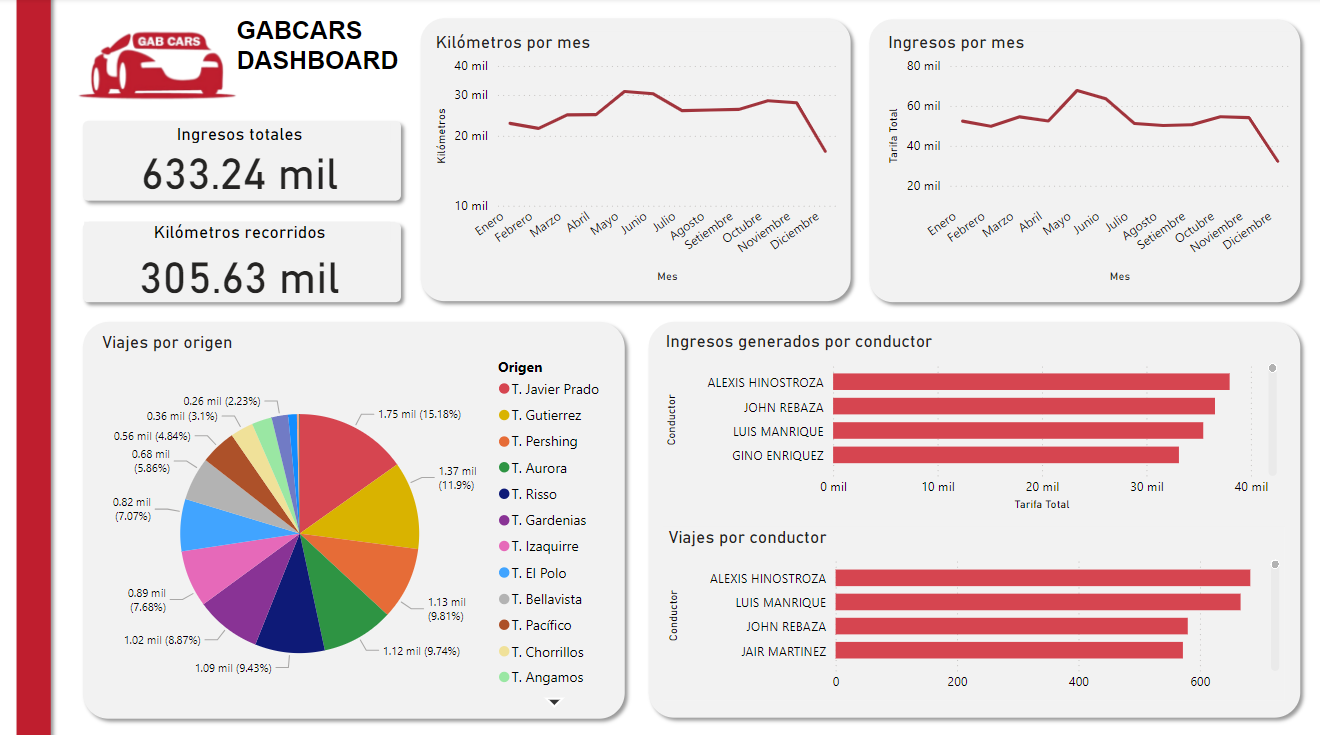

In [42]:
from IPython.display import Image
Image("//kaggle/input/dashboard/DASHBOARD.png")

> El análisis de los datos revela patrones significativos en el desempeño de la empresa a lo largo del año pasado. En primer lugar, se observa un aumento constante en los ingresos al inicio de cada semana, con picos destacados en los meses de junio y diciembre. Estos meses podrían considerarse como períodos de alta demanda, lo que sugiere la necesidad de evaluar los factores que influyeron en este incremento y buscar oportunidades para mejorar el rendimiento en otros períodos. Además, al examinar el kilometraje de nuestros vehículos, se destaca una tendencia similar, con picos notables durante los meses de junio y julio. Es interesante notar que el mes con el mayor kilometraje, junio, coincide con el aumento de ingresos registrado en el mismo período. Esto podría indicar una mayor demanda de nuestros servicios durante este tiempo, lo que podría explicar el incremento en el kilometraje de los vehículos. Al analizar los destinos de los viajes, se observa que T. Javier Prado es el cliente más frecuente, seguido de cerca por T. Gutiérrez y T. Pershing. Esta información sugiere la existencia de relaciones sólidas con ciertos clientes y podría utilizarse para desarrollar estrategias de fidelización o para enfocar los esfuerzos de marketing en aquellos segmentos de clientes más activos. Por último, al revisar la participación de los conductores en el servicio, se destaca que el señor Alex Hinostroza fue el conductor más solicitado y generó los mayores ingresos durante el período de análisis. Esta correlación entre la cantidad de viajes realizados y los ingresos generados sugiere la importancia de asignar eficientemente los recursos humanos para maximizar el rendimiento financiero de la empresa. 

<a id='conclu'></a>
# Conclusiones finales
## Para finalizar este storytelling, podemos concluir que : 
- El análisis muestra que los tiempos de espera son un factor crítico en la percepción de calidad del servicio por parte de los usuarios. Los datos históricos indican que los tiempos de espera han mejorado gradualmente, pero aún existen picos en horas punta que afectan la satisfacción del cliente.
- Se ha identificado una correlación directa entre el kilometraje recorrido y el número de viajes realizados. La eficiencia operativa se ve impactada en las rutas largas, donde se observa una mayor proporción de viajes con menos pasajeros, lo que indica una oportunidad para optimizar la asignación de vehículos.
- Los clientes frecuentes representan una porción significativa del negocio. Sin embargo, los datos revelan que no se les está dando un tratamiento preferencial en términos de tiempos de respuesta y beneficios adicionales, lo cual podría ser una oportunidad de mejora para fidelizar a estos usuarios.
- El análisis de la utilización de los recursos muestra que existe una capacidad no aprovechada en ciertos periodos del día. La asignación de vehículos y conductores podría mejorarse mediante una planificación más precisa basada en la demanda real.



## En base a esto, también recomendamos:
- Desarrollar e implementar un sistema automatizado que monitorice en tiempo real los tiempos de espera y ajuste dinámicamente la asignación de vehículos para minimizar los retrasos, especialmente durante las horas punta.
- Realizar un estudio detallado de las rutas y ajustar la asignación de vehículos para equilibrar el kilometraje recorrido con el número de pasajeros. Considerar la implementación de rutas compartidas en las zonas con menor demanda.
- Crear un programa de fidelización que ofrezca beneficios exclusivos a los clientes frecuentes, como tiempos de respuesta prioritarios, descuentos en viajes recurrentes y servicios adicionales gratuitos.
- Implementar un sistema de gestión de recursos que permita la reasignación dinámica de vehículos y conductores según la demanda real. Utilizar herramientas de análisis predictivo para anticipar los picos de demanda y ajustar la capacidad operativa en consecuencia.
